In [2]:
#加载数据
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head(5)

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
#定义数据
X = data.drop(['labels'],axis=1)
y = data.loc[:,'labels']
X.head(5),y.head(5)

(          V1         V2
 0   2.072345  -3.241693
 1  17.936710  15.784810
 2   1.083576   7.319176
 3  11.120670  14.406780
 4  23.711550   2.557729,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: labels, dtype: int64)

In [4]:
#建立模型 #,estimate_bandwidth 估计带宽
from sklearn.cluster import MeanShift,estimate_bandwidth
#选择带宽 
bw = estimate_bandwidth(X,n_samples=500) #希望使用500个样本去估算
print(bw)

30.84663454820215


In [5]:
#建立模型
ms = MeanShift(bandwidth=bw)
ms.fit(X) #无监督学习 不需要y

MeanShift(bandwidth=30.84663454820215)

In [6]:
#查看预测结果
y_predict_ms= ms.predict(X)
print(pd.value_counts(y_predict_ms))#自动的规划成三类 （可能对应的标签不同）

0    1149
1     952
2     899
dtype: int64


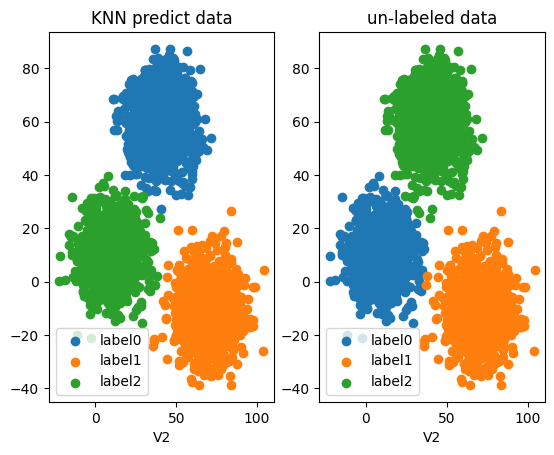

In [7]:
#可视化

%matplotlib inline
from matplotlib import pyplot as plt

# KM_center = KM.cluster_centers_

fig = plt.subplot(1,2,1)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_ms==0],X.loc[:,'V2'][y_predict_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_ms==1],X.loc[:,'V2'][y_predict_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_ms==2],X.loc[:,'V2'][y_predict_ms==2])
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.title("KNN predict data")
plt.xlabel('V1')
plt.xlabel('V2')
# plt.scatter(KM_center[:,0],KM_center[:,1])

fig = plt.subplot(1,2,2)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.title("un-labeled data")
plt.xlabel('V1')
plt.xlabel('V2')
# plt.scatter(KM_center[:,0],KM_center[:,1])
plt.show()

In [9]:
#数据的矫正
y_correct = []
for i in y_predict_ms:
    if i == 0:
        y_correct.append(2)
    elif i == 1:
        y_correct.append(1)
    else:
        y_correct.append(0)
        
print(pd.value_counts(y_correct),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [11]:
#评估模型准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_correct)
accuracy

0.997